# Using Qiskit Aer

abraham.asfaw@ibm.com<br/>
April 2019<br/>
(Thanks to cjwood@us.ibm.com)

Qiskit Aer is a local simulation provider for Qiskit.

**QasmSimulator** Simulates experiments (returns counts)<br/>
**StatevectorSimulator** Simulates an ideal shot of an experiment (returns statevector)<br/>
**UnitarySimulator** Simulates an ideal circuit (return circuit unitary)<br/>

## A note about simulations

In [1]:
# 30 qubits = 16 GB
num_qubits = 32
memoryneeded_GB = 16 * 2 ** (num_qubits - 30)
print(memoryneeded_GB)

64


# Outline

1. [QasmSimulator](#qasmsimulator)<br/>
    1.1 [Ideal Simulations using QasmSimulator](#qasmsimulatorideal)<br/>
    1.2 [Results on a real quantum computer](#qasmsimulatorreal)<br/>
    1.3 [Realistic simulations using QasmSimulator and Aer noise models](#qasmsimulatorsimnoise)<br/>
    
2. [StatevectorSimulator](#svsimulator)<br/>
3. [UnitarySimulator](#usimulator)<br/>

## 1 QasmSimulator<a id='qasmsimulator'></a>


## 1.1 Ideal Simulations using QasmSimulator<a id='qasmsimulatorideal'></a>
* Qiskit Aer is a local simulation provider for Qiskit.
* We will briefly show how to do ideal simulations with Qiskit-Aer.
* These are taken from the Aer Provider tutorial in qiskit-tutorials.

In [2]:
# qiskit imports
from qiskit import Aer
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor

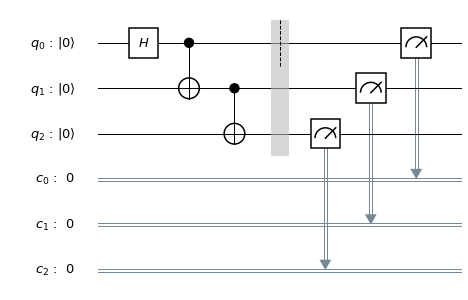

In [3]:
nqubits = 3
qr = QuantumRegister(nqubits, 'q')
cr = ClassicalRegister(nqubits, 'c')
GHZ3_circuit = QuantumCircuit(qr, cr)
GHZ3_circuit.h(qr[0])
GHZ3_circuit.cx(qr[0], qr[1])
GHZ3_circuit.cx(qr[1], qr[2])
GHZ3_circuit.barrier(qr)
GHZ3_circuit.measure(qr, cr)

GHZ3_circuit.draw(output = 'mpl')

{'000': 1028, '111': 1020}


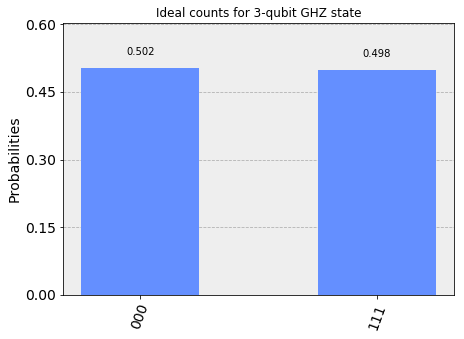

In [4]:
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(GHZ3_circuit, simulator, shots=2048).result()
counts = result.get_counts(GHZ3_circuit)
print(counts)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

### Returning measurements outcomes for each shot

QasmSimulator also supports returning a list of outcomes for each shot.
Enabled by setting the keyword argument **memory=True** in compile or execute

In [5]:
# Execute and get memory
result = execute(GHZ3_circuit, simulator, shots=10, memory=True).result()
memory = result.get_memory(GHZ3_circuit)
print(memory)

['111', '111', '111', '000', '000', '000', '000', '000', '111', '111']


## 1.2 Results on a real quantum computer<a id='qasmsimulatorreal'></a>

In [6]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, yrk, main)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, yrk, main)>]

In [7]:
device = IBMQ.get_backend('ibmq_16_melbourne')

In [8]:
job_device = execute(GHZ3_circuit, backend=device, shots=1024)
job_monitor(job_device)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

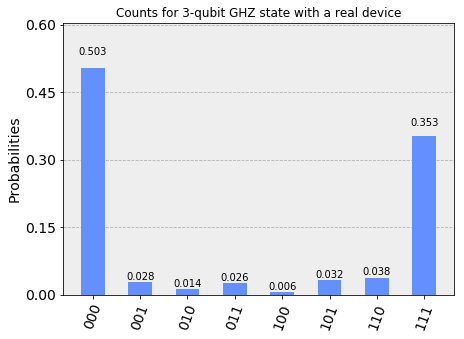

In [9]:
result_device = job_device.result(timeout = 1800)         
counts_device = result_device.get_counts(GHZ3_circuit)
plot_histogram(counts_device, title="Counts for 3-qubit GHZ state with a real device")

## 1.3 Realistic simulations using QasmSimulator and Aer noise models<a id='qasmsimulatorsimnoise'></a>

In [10]:
from qiskit.providers.aer import noise

In [11]:
device = IBMQ.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map

In [12]:
print(properties)

BackendProperties(backend_name='ibmq_16_melbourne', backend_version='1.0.0', gates=[Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[0]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', unit='', value=0.003923349176525259)], qubits=[0]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', unit='', value=0.007846698353050519)], qubits=[0]), Gate(gate='u1', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', unit='', value=0.0)], qubits=[1]), Gate(gate='u2', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', unit='', value=0.008036480883925834)], qubits=[1]), Gate(gate='u3', parameters=[Nduv(date=datetime.datetime(2019, 4, 3, 6, 37, 40, tzinfo=tzutc()), name='gate_error', 

In [13]:
for qubit in properties.qubits:
    print(qubit)
    print('\n'.join(qubitprop.name + "=" + str(qubitprop.value) + " " + qubitprop.unit for qubitprop in qubit))
    print()

[Nduv(date=datetime.datetime(2019, 4, 2, 6, 29, 15, tzinfo=tzutc()), name='T1', unit='µs', value=82.66743343717738), Nduv(date=datetime.datetime(2019, 4, 2, 6, 30, 28, tzinfo=tzutc()), name='T2', unit='µs', value=22.3073939842012), Nduv(date=datetime.datetime(2019, 4, 2, 6, 59, 16, tzinfo=tzutc()), name='frequency', unit='GHz', value=5.100000874773221), Nduv(date=datetime.datetime(2019, 4, 2, 6, 28, 51, tzinfo=tzutc()), name='readout_error', unit='', value=0.023700000000000054)]
T1=82.66743343717738 µs
T2=22.3073939842012 µs
frequency=5.100000874773221 GHz
readout_error=0.023700000000000054 

[Nduv(date=datetime.datetime(2019, 4, 2, 6, 29, 15, tzinfo=tzutc()), name='T1', unit='µs', value=61.578805159377275), Nduv(date=datetime.datetime(2019, 4, 2, 6, 31, 29, tzinfo=tzutc()), name='T2', unit='µs', value=88.1079163970099), Nduv(date=datetime.datetime(2019, 4, 2, 6, 59, 16, tzinfo=tzutc()), name='frequency', unit='GHz', value=5.238469622627604), Nduv(date=datetime.datetime(2019, 4, 2, 6, 

In [14]:
for gate in properties.gates:
    print('Gate = {}, Relevant Qubits = {}, Error = {}'.format(
                gate.gate, 
                gate.qubits, 
                gate.parameters[0].value, 
                gate.parameters[0].unit
    ))

Gate = u1, Relevant Qubits = [0], Error = 0.0
Gate = u2, Relevant Qubits = [0], Error = 0.003923349176525259
Gate = u3, Relevant Qubits = [0], Error = 0.007846698353050519
Gate = u1, Relevant Qubits = [1], Error = 0.0
Gate = u2, Relevant Qubits = [1], Error = 0.008036480883925834
Gate = u3, Relevant Qubits = [1], Error = 0.016072961767851668
Gate = u1, Relevant Qubits = [2], Error = 0.0
Gate = u2, Relevant Qubits = [2], Error = 0.005038884540213395
Gate = u3, Relevant Qubits = [2], Error = 0.01007776908042679
Gate = u1, Relevant Qubits = [3], Error = 0.0
Gate = u2, Relevant Qubits = [3], Error = 0.0019389274557966574
Gate = u3, Relevant Qubits = [3], Error = 0.0038778549115933147
Gate = u1, Relevant Qubits = [4], Error = 0.0
Gate = u2, Relevant Qubits = [4], Error = 0.005820156179423441
Gate = u3, Relevant Qubits = [4], Error = 0.011640312358846883
Gate = u1, Relevant Qubits = [5], Error = 0.0
Gate = u2, Relevant Qubits = [5], Error = 0.002159186666901236
Gate = u3, Relevant Qubits = [

In [15]:
print(coupling_map)

[[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]


Let's visualize the coupling map for the backend device

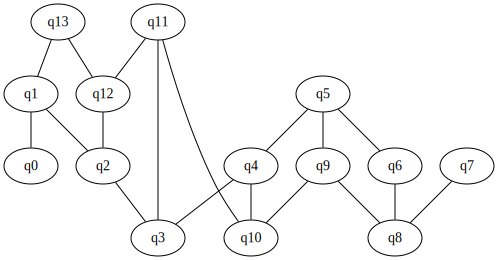

In [16]:
import graphviz
coupling_graph = graphviz.Graph()
for edge in coupling_map:
    coupling_graph.edge('q'+str(edge[0]), 'q'+str(edge[1]))
coupling_graph

Or go to 
[https://quantumexperience.ng.bluemix.net/qx/devices](https://quantumexperience.ng.bluemix.net/qx/devices)
to see the device coupling map

In [17]:
# List of gate times for ibmq_16_melbourne device
# Note that the None parameter for u1, u2, u3 is because gate
# times are the same for all qubits
# Erick Winston
gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

# Construct the noise model from backend properties
# and custom gate times
#noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)
noise_model = noise.device.basic_device_noise_model(properties, gate_times = gate_times, temperature=10)
print(noise_model)

NoiseModel:
  Instructions with noise: ['cx', 'u3', 'measure', 'u2']
  Specific qubit errors: [('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u2', [5]), ('u2', [6]), ('u2', [7]), ('u2', [8]), ('u2', [9]), ('u2', [10]), ('u2', [11]), ('u2', [12]), ('u2', [13]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('u3', [5]), ('u3', [6]), ('u3', [7]), ('u3', [8]), ('u3', [9]), ('u3', [10]), ('u3', [11]), ('u3', [12]), ('u3', [13]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [2, 3]), ('cx', [4, 3]), ('cx', [4, 10]), ('cx', [5, 4]), ('cx', [5, 6]), ('cx', [5, 9]), ('cx', [6, 8]), ('cx', [7, 8]), ('cx', [9, 8]), ('cx', [9, 10]), ('cx', [11, 3]), ('cx', [11, 10]), ('cx', [11, 12]), ('cx', [12, 2]), ('cx', [13, 1]), ('cx', [13, 12]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4]), ('measure', [5]), ('measure', [6]), ('measure', [7]), ('measure', [8]), ('measure', [9]), ('measure', [10]), ('measure', [11]), ('measure', [12]

In [18]:
help(noise.device.basic_device_noise_model)

Help on function basic_device_noise_model in module qiskit.providers.aer.noise.device.models:

basic_device_noise_model(properties, readout_error=True, thermal_relaxation=True, temperature=0, gate_times=None, standard_gates=True)
    Approximate device noise model derived from backend properties.
    
    Params:
        properties (BackendProperties): backend properties
        readout_errors (Bool): Include readout errors in model
                               (Default: True).
        thermal_relaxation (Bool): Include thermal relaxation errors
                                   (Default: True).
        temperature (double): qubit temperature in milli-Kelvin (mK) for
                              thermal relaxation errors (Default: 0).
        gate_times (list): Custom gate times for thermal relaxation errors.
                           Used to extend or override the gate times in
                           the backend properties (Default: None).
        standard_gates (bool): If tr

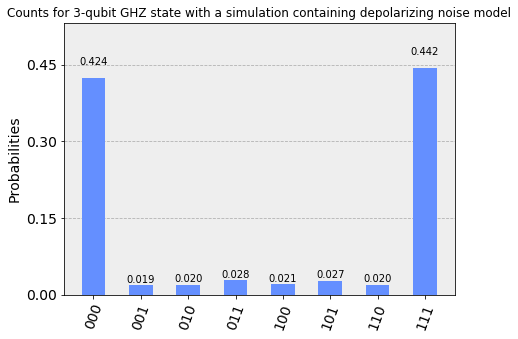

In [19]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get corunts
job_noise = execute(GHZ3_circuit, simulator, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
result_noise = job_noise.result()
counts_noise = result_noise.get_counts(GHZ3_circuit)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with a simulation containing depolarizing noise model")

More advanced error models can be incorporated into your simulations. For example, 

For additional details, see [Chris Wood's Qiskit Camp Talk about Qiskit Aer Simulations](https://github.com/Qiskit/qiskit-presentations/blob/master/2019-02-26_QiskitCamp/QiskitCamp_Simulation.ipynb).

## 2 StatevectorSimulator<a id='svsimulator'></a>

* Simulates a single-shot of a QuantumCircuit and returns the final quantum statevector.
* The circuit may contain gates, and also measure, reset, and conditional operations.
* If measure/reset operations are in the circuit, the measurement outcome (counts) will also be returned (with $N=1$ shots).
* A custom initial statevector $|\psi_0\rangle$ can be used (same as for QasmSimulator)

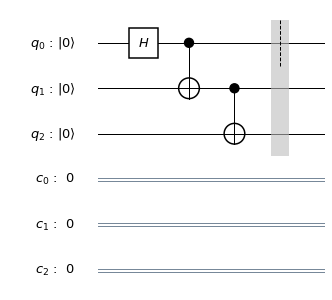

In [20]:
nqubits = 3
qr = QuantumRegister(nqubits, 'q')
cr = ClassicalRegister(nqubits, 'c')
GHZ3_circuit = QuantumCircuit(qr, cr)
GHZ3_circuit.h(qr[0])
GHZ3_circuit.cx(qr[0], qr[1])
GHZ3_circuit.cx(qr[1], qr[2])
GHZ3_circuit.barrier(qr)
#GHZ3_circuit.measure(qr, cr)

GHZ3_circuit.draw(output = 'mpl')

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

((0.7071067811865476+0j)) * |0>
(0j) * |1>
(0j) * |2>
(0j) * |3>
(0j) * |4>
(0j) * |5>
(0j) * |6>
((0.7071067811865475+0j)) * |7>


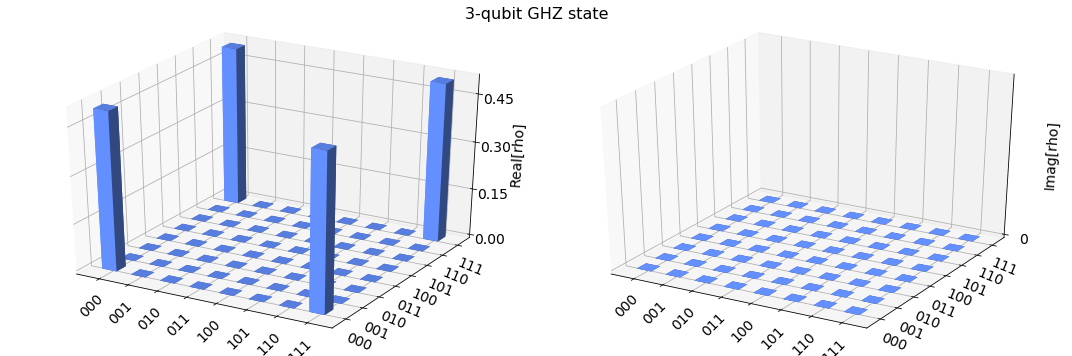

In [21]:
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(GHZ3_circuit, simulator).result()
finalstate = result.get_statevector(GHZ3_circuit)

print(finalstate)
print()
for statecoeff, statenum in zip(finalstate, range(2**len(qr))):
    print("({}) * |{}>".format(statecoeff,  statenum))
plot_state_city(finalstate, title='3-qubit GHZ state')

## 3 UnitarySimulator<a id='usimulator'></a>

* Constructs the full $n$-qubit unitary matrix for a QuantumCircuit.
* Done by applying each gate matrix to an initial identity matrix.
* Circuit may only contain gates

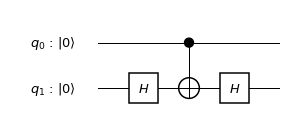

In [22]:
nqubits = 2
qr = QuantumRegister(nqubits, 'q')
cz1 = QuantumCircuit(qr)
cz1.h(qr[1])
cz1.cx(qr[0], qr[1])
cz1.h(qr[1])

cz1.draw(output = 'mpl')

In [23]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
job_sim = execute(cz1, simulator)
result = job_sim.result()
unitary = result.get_unitary(cz1)
print("Final Unitary:")
print(unitary)

Final Unitary:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


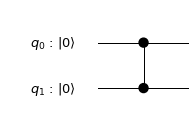

In [24]:
nqubits = 2
qr = QuantumRegister(nqubits, 'q')
cz2 = QuantumCircuit(qr)
cz2.cz(qr[0], qr[1])

cz2.draw(output = 'mpl')

In [25]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
job_sim = execute(cz2, simulator)
result = job_sim.result()
unitary = result.get_unitary(cz2)
print("Final Unitary:")
print(unitary)

Final Unitary:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
